In [1]:
import reactord as rd
import reactord.flowreactors.stationary_1d.pfr as pfr

import numpy as np

import matplotlib.pyplot as plt

In [105]:
def cpa(t, p):
    return np.full(len(t), 163)


def cpb(t, p):
    return np.full(len(t), 83)


def cpc(t, p):
    return np.full(len(t), 71)


def int_cpa(t1, t2, p):
    return 163 * (t2 - t1)


def int_cpb(t1, t2, p):
    return 83 * (t2 - t1)


def int_cpc(t1, t2, p):
    return 71 * (t2 - t1)


def r_rate(c, t, cons):
    k = 8.2e14 * np.exp(-34222 / t)  # 1/s

    return k * c["acetone"]


a = rd.Substance(
    "acetone",
    formation_enthalpy_ig=-216.67 * 1000,
    heat_capacity_gas=cpa,
    heat_capacity_gas_dt_integral=int_cpa,
)

b = rd.Substance(
    "anhydride",
    formation_enthalpy_ig=-61.09 * 1000,
    heat_capacity_gas=cpb,
    heat_capacity_gas_dt_integral=int_cpb,
)

c = rd.Substance(
    "methane",
    formation_enthalpy_ig=-74.81 * 1000,
    heat_capacity_gas=cpc,
    heat_capacity_gas_dt_integral=int_cpc,
)

mix = rd.mix.IdealGas([a, b, c])

kinetic = rd.Kinetic(
    mix=mix,
    reactions={"r1": {"eq": a > b + c, "rate": r_rate}},
    kinetic_constants={},
    rates_argument="concentration",
)

mb = pfr.mass_balances.MolarFlow(
    molar_flows_in={"acetone": 0.0376, "anhydride": 0, "methane": 0},
)
eb = pfr.energy_balances.NoIsothermicAllConstant(
    temperature_in_or_out={"in": 1035},
    refrigerant_in_temperature=1250,
    heat_exchange_coefficient=110,
)
pb = pfr.pressure_balances.Isobaric(162 * 1000)

area = np.pi * (2.54 / 100) ** 2 / 4

reactor = pfr.PFR(
    kinetic=kinetic,
    reactor_length=1 / 1000 / area,
    transversal_area=area,
    grid_size=5000,
    mass_balance=mb,
    energy_balance=eb,
    pressure_balance=pb,
)

reactor.simulate(1e-8, bc_tol=1e-5, max_nodes=10_000)

# Fogler data
t_z = (
    np.array(
        [
            0.0159,
            0.0398,
            0.0677,
            0.0956,
            0.1275,
            0.1753,
            0.2191,
            0.259,
            0.3028,
            0.3506,
            0.3904,
            0.4382,
            0.4821,
            0.5498,
            0.6215,
            0.6773,
            0.749,
            0.8287,
            0.8924,
            0.9522,
            0.996,
        ]
    )
    / 1000
    / area
)
t = np.array(
    [
        1033.93,
        1030.44,
        1030.44,
        1031.31,
        1032.62,
        1035.24,
        1037.86,
        1040.49,
        1043.54,
        1047.04,
        1050.10,
        1053.59,
        1057.09,
        1062.33,
        1068.45,
        1073.25,
        1080.24,
        1088.98,
        1097.28,
        1106.46,
        1113.88,
    ]
)

x_z = (
    np.array(
        [
            0.0121,
            0.0684,
            0.1206,
            0.193,
            0.2814,
            0.3537,
            0.426,
            0.4983,
            0.5705,
            0.6428,
            0.719,
            0.8073,
            0.9036,
            0.9958,
        ]
    )
    / 1000
    / area
)
x = np.array(
    [
        0.0194,
        0.0922,
        0.1553,
        0.2427,
        0.3398,
        0.4223,
        0.4951,
        0.568,
        0.6311,
        0.6942,
        0.7524,
        0.8204,
        0.8883,
        0.9466,
    ]
)

rd_temps = reactor.ode_solution.sol(t_z)[-3]
rd_facetone = reactor.ode_solution.sol(x_z)[0]
rd_x = (0.0376 - rd_facetone) / (0.0376)

/tmp/ipykernel_4361/1530499519.py:20: RuntimeWarning: overflow encountered in exp
  k = 8.2e14 * np.exp(- 34222 / t) # 1/s
/home/salvadorbrandolin/.virtualenvs/reactord/lib/python3.10/site-packages/scipy/integrate/_bvp.py:567: RuntimeWarning: invalid value encountered in divide
  r1 /= 1 + np.abs(f1)
/home/salvadorbrandolin/.virtualenvs/reactord/lib/python3.10/site-packages/scipy/integrate/_bvp.py:570: RuntimeWarning: overflow encountered in multiply
  r1 = np.sum(np.real(r1 * np.conj(r1)), axis=0)
/home/salvadorbrandolin/.virtualenvs/reactord/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/salvadorbrandolin/.virtualenvs/reactord/lib/python3.10/site-packages/scipy/integrate/_bvp.py:571: RuntimeWarning: overflow encountered in multiply
  r2 = np.sum(np.real(r2 * np.conj(r2)), axis=0)
/home/salvadorbrandolin/.virtualenvs/reactord/lib/python3.10/site-packages/scipy/in

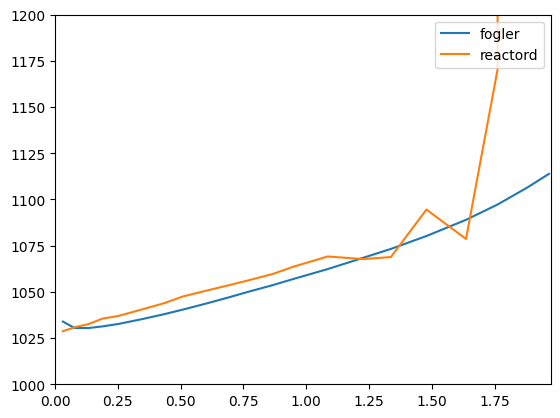

In [106]:
plt.plot(t_z, t, label="fogler")

plt.plot(t_z, reactor.ode_solution.sol(t_z)[-3], label="reactord")

plt.xlim(0, 1 / 1000 / area)

plt.ylim(1000, 1200)

plt.legend()

(0.0, 1.0)

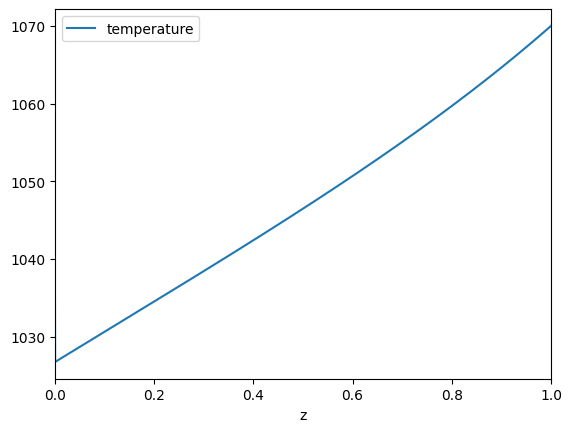

In [84]:
reactor.sim_df.plot("z", "temperature")
plt.xlim(0, 1)

In [110]:
from scipy.integrate import solve_ivp

In [111]:
def f(t, y):
    return np.cos(y)

In [119]:
sol = solve_ivp(f, np.array([0, np.pi]), y0=np.array([0]))

ValueError: `y0` must be 1-dimensional.

In [118]:
sol.y

array([[0.00000000e+00, 9.99999998e-05, 1.09999978e-03, 1.10997721e-02,
        1.10872148e-01, 9.34798602e-01, 1.37822938e+00, 1.48432419e+00]])

ValueError: x and y must have same first dimension, but have shapes (8,) and (1, 8)

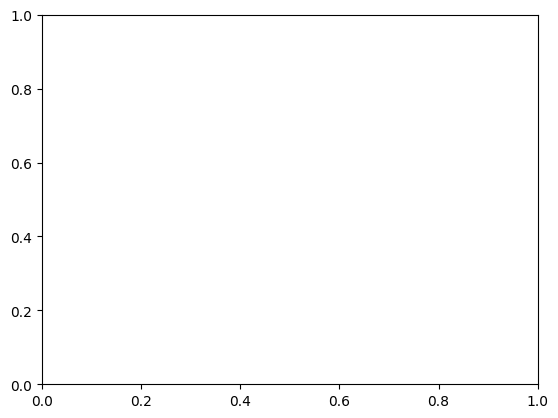

In [115]:
plt.plot(sol.t, sol.y)